### ANOVA

In [ ]:
#Library
from sklearn import datasets
#Dataset
iris=datasets.load_iris()

In [ ]:
iris.data #output is value

In [ ]:
iris  #output will be dictionary {}

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

In [ ]:
df["Target"]=iris.target  #Adding column "Target"
df

In [ ]:
df.iloc[:,1]

In [ ]:
df[df["Target"]==0]

In [ ]:
df[df["Target"]==1]

In [ ]:
df[df["Target"]==2]

In [ ]:
df[df["Target"]==0]['sepal width (cm)']

In [ ]:
df[df["Target"]==1]['sepal width (cm)']

In [ ]:
df[df["Target"]==2]['sepal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
group1_setosa=df[df["Target"]==0]["sepal width (cm)"]
group2_versicolor=df[df["Target"]==1]["sepal width (cm)"]
group3_virginica=df[df["Target"]==2]["sepal width (cm)"]

In [ ]:
group1_setosa

In [ ]:
group2_versicolor

In [ ]:
group3_virginica

In [ ]:
group1_setosa.mean(),group2_versicolor.mean(),group3_virginica.mean()

(3.428, 2.7700000000000005, 2.974)

In [ ]:
group1_setosa.hist()

In [ ]:
group2_versicolor.hist()

In [ ]:
group3_virginica.hist()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.displot(data=df,
            x="sepal width (cm)",
            hue="Target",
            fill="Target",
            kind="kde",
            palette=["Blue","Orange","Green"])

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(range(1,51),group1_setosa)
plt.scatter(range(1,51),group2_versicolor)
plt.scatter(range(1,51),group3_virginica)

plt.legend(iris.target_names)
plt.show()

In [ ]:
from scipy import stats
# f_oneway = one way ANOVA
stats.f_oneway(group1_setosa,group2_versicolor,group3_virginica)
# p-value is 4.49*10^-17 which is approximately equal to 0. So p<alpha
#So reject null hypothesis. Interpretation: At least 1 of them is different.


F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

In [ ]:
#Another example of one way ANOVA
df1=pd.DataFrame(iris.data)
stats.f_oneway(df.iloc[:,1],df.iloc[:,2],df.iloc[:,3])
# p-value is 4.66*10^-159 which is approximately equal to 0. So reject null hypothesis.

F_onewayResult(statistic=202.38927966902523, pvalue=2.604432357143522e-63)

### Chi Square Test

In [ ]:
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
# Athlete and Smoker example: These are observed frequencies
data=[[14,4],
      [0,10]]
data

[[14, 4], [0, 10]]

In [ ]:
df=pd.DataFrame(data,
             index=["Athlete","Non-Athlete"],
             columns=["Non-Smoker","Smoker"])

In [ ]:
df

,Non-Smoker,Smoker
Athlete,14,4
Non-Athlete,0,10


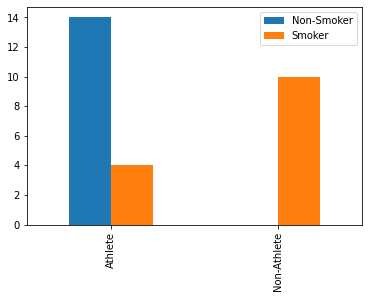

In [ ]:
df.plot(kind="bar",
        stacked=False)
plt.show()

In [ ]:
chi2_contingency(data) #test statistics, p-value, df, expected frequency.
#p-value 0.00038 < 0.005 so reject null hypothesis.
# (Both variables are independent)

(12.600000000000001, 0.0003857467556820071, 1, array([[9., 9.],
        [5., 5.]]))